# XGBoost

## I. Data

### **1. Libraries**

In [79]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### **2. Load data**

In [7]:
astro_data=pd.read_csv('astro_data2.csv', sep=',', encoding='utf8')

### **3. Dataframe head**

In [8]:
astro_data.head(10)

,Unnamed: 0,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,star
1,1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,star
2,2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,galaxy
3,3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,star
4,4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,star
5,5,0.695082,0.075162,0.000831,0.007122,0.593594,0.593735,0.221552,0.420061,star
6,6,0.695151,0.073072,0.019481,0.002579,0.558559,0.483823,0.133452,0.472879,galaxy
7,7,0.695292,0.075348,0.000831,0.373281,0.514515,0.514510,0.216695,0.440919,star
8,8,0.695389,0.074128,0.000789,0.006999,0.594595,0.436979,0.296010,0.458723,star
9,9,0.695582,0.073916,0.008332,0.002701,0.399399,0.516311,0.257842,0.450275,galaxy


In [9]:
astro_data.shape

(10000, 10)

In [10]:
astro_data.isnull().sum()

Unnamed: 0    0
ra            0
dec           0
redshift      0
plate         0
fiberid       0
PCA_1         0
PCA_2         0
PCA_3         0
class         0
dtype: int64

In [11]:
print(astro_data.shape[0],'lignes',astro_data.shape[1],'colonnes')

10000 lignes 10 colonnes


### **4. Drop the "unnamed" column".**

In [20]:
astro_data = astro_data.drop(['Unnamed: 0'],axis=1)
astro_data

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,star
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,star
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,galaxy
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,star
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,star
...,...,...,...,...,...,...,...,...,...
9995,0.487163,0.770000,0.005920,0.022225,0.245245,0.467976,0.203809,0.440477,galaxy
9996,0.487122,0.771783,0.022753,0.022225,0.227227,0.469694,0.263266,0.495585,galaxy
9997,0.488097,0.771724,0.000697,0.864072,0.621622,0.527653,0.260387,0.422956,star
9998,0.487799,0.772888,0.003388,0.022225,0.228228,0.523447,0.230994,0.465101,galaxy


### **5. Columns names.**

Columns : 
- ra : right ascension
- dec : declination
- redshift :  Final Redshift
- plate : plate number
- fiberid : fiber ID
- First PCA Component
- Second PCA Component
- Third PCA Component
- Class : object class (galaxy, star or quasar object)

In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

In [21]:
astro_data.columns

Index(['ra', 'dec', 'redshift', 'plate', 'fiberid', 'PCA_1', 'PCA_2', 'PCA_3',
       'class'],
      dtype='object')

### **6. Dataframe shape**

In [22]:
astro_data.shape

(10000, 9)

### **7. Target distribution**

In [ ]:
Target1 = diabete_df['Outcome']
X1 = diabete_df.iloc[:,:-1]
# methode 2 
d1 =astro_data
d2=astro_data
Target=d2.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI','DiabetesPedigreeFunction', 'Age'],axis=1)
X2=d1.drop(["Outcome"],axis=1)

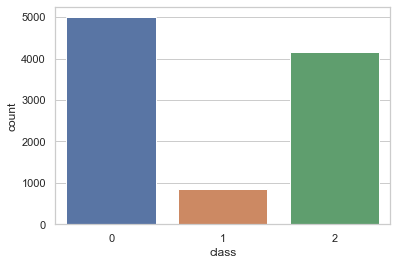

In [85]:
sns.countplot(astro_data['class'])
plt.show()

### **8. Columns types**

In [25]:
astro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   redshift  10000 non-null  float64
 3   plate     10000 non-null  float64
 4   fiberid   10000 non-null  float64
 5   PCA_1     10000 non-null  float64
 6   PCA_2     10000 non-null  float64
 7   PCA_3     10000 non-null  float64
 8   class     10000 non-null  object 
dtypes: float64(8), object(1)
memory usage: 703.2+ KB


### **9. Df describe**

In [24]:
astro_data.describe(include='all')

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,galaxy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998
mean,0.662163,0.273504,0.027597,0.146732,0.352422,0.457398,0.218337,0.455214,NaN
std,0.189130,0.341052,0.072560,0.219644,0.206505,0.105448,0.074867,0.040324,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.590288,0.065521,0.000787,0.004298,0.185936,0.392505,0.163367,0.432861,NaN
50%,0.681417,0.078279,0.008721,0.021488,0.350350,0.460267,0.214737,0.455051,NaN
75%,0.765140,0.555050,0.018051,0.281557,0.509510,0.524651,0.267016,0.478103,NaN


# II. Data visualization


### **1. Plot the `redshift` distribution per class.**

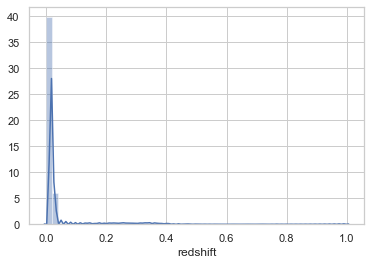

In [26]:
sns.distplot(astro_data['redshift'])

### **3. Using a `lmplot` from `seaborn`, plot the relation between `dec ` and `ra` by `class` .**

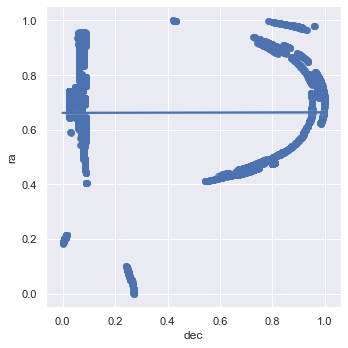

In [28]:
g = sns.lmplot(x="dec", y="ra", data=astro_data)

### **2. Plot the features correlation.**

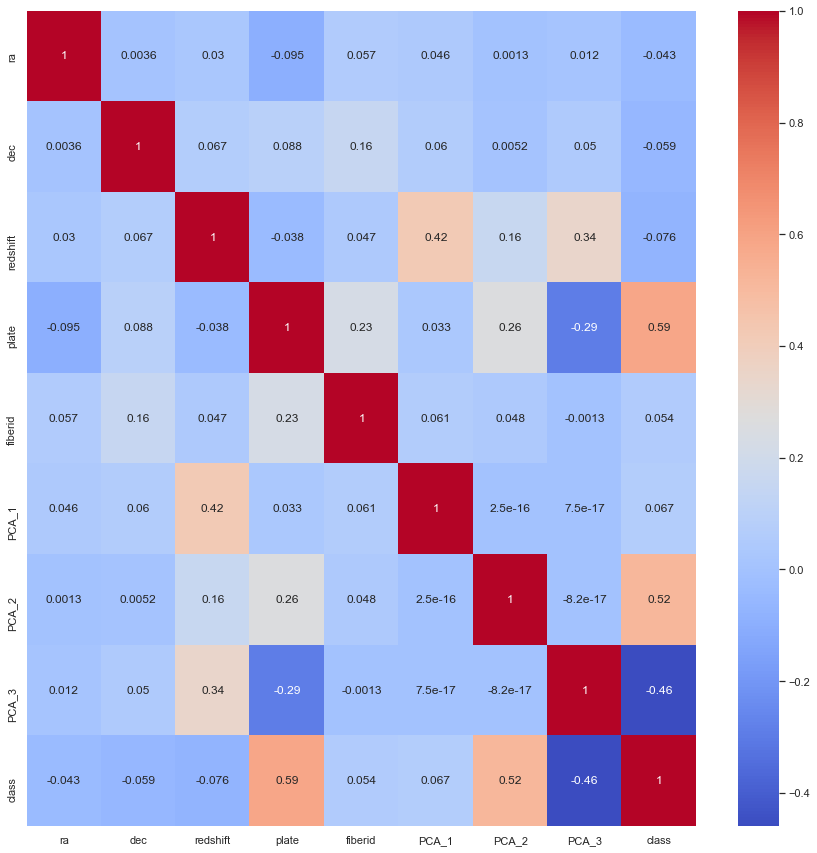

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(astro_data.corr(), annot=True, square=False, cmap="coolwarm")
plt.show()

### **3. Target encoding.**

In [37]:
le=LabelEncoder()
astro_data['class']=le.fit_transform(astro_data['class'])
astro_data

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,2
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,2
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,0
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,2
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,2
...,...,...,...,...,...,...,...,...,...
9995,0.487163,0.770000,0.005920,0.022225,0.245245,0.467976,0.203809,0.440477,0
9996,0.487122,0.771783,0.022753,0.022225,0.227227,0.469694,0.263266,0.495585,0
9997,0.488097,0.771724,0.000697,0.864072,0.621622,0.527653,0.260387,0.422956,2
9998,0.487799,0.772888,0.003388,0.022225,0.228228,0.523447,0.230994,0.465101,0


### **4. MinMax features scaling.**

In [38]:
from sklearn.preprocessing import MinMaxScaler
data = astro_data
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


## 5 Xbboost classifier with  100 trees

# III. Model


### **1. Train Test Split.**

In [47]:
X2=astro_data.drop(["class"],axis=1)

In [48]:
X2.head(10)

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918
5,0.695082,0.075162,0.000831,0.007122,0.593594,0.593735,0.221552,0.420061
6,0.695151,0.073072,0.019481,0.002579,0.558559,0.483823,0.133452,0.472879
7,0.695292,0.075348,0.000831,0.373281,0.514515,0.514510,0.216695,0.440919
8,0.695389,0.074128,0.000789,0.006999,0.594595,0.436979,0.296010,0.458723
9,0.695582,0.073916,0.008332,0.002701,0.399399,0.516311,0.257842,0.450275


In [45]:
Target=astro_data.drop(['ra', 'dec', 'redshift', 'plate', 'fiberid',
       'PCA_1','PCA_2', 'PCA_3'],axis=1)

In [46]:
Target.head(10)

,class
0,2
1,2
2,0
3,2
4,2
5,2
6,0
7,2
8,2
9,0


In [51]:
Y_1=pd.DataFrame(Target)
X_2=pd.DataFrame(X2)
print(Y_1)
print(X_2)

      class
0         2
1         2
2         0
3         2
4         2
...     ...
9995      0
9996      0
9997      2
9998      0
9999      0

[10000 rows x 1 columns]
            ra       dec  redshift     plate   fiberid     PCA_1     PCA_2  \
0     0.693832  0.074025  0.000770  0.373281  0.490490  0.385886  0.069348   
1     0.694098  0.074642  0.000762  0.006999  0.540541  0.448110  0.215264   
2     0.694422  0.074519  0.023749  0.002579  0.512513  0.518964  0.154511   
3     0.695175  0.073487  0.000751  0.373281  0.509510  0.388785  0.279638   
4     0.695225  0.074199  0.000882  0.373281  0.511512  0.417103  0.357613   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.487163  0.770000  0.005920  0.022225  0.245245  0.467976  0.203809   
9996  0.487122  0.771783  0.022753  0.022225  0.227227  0.469694  0.263266   
9997  0.488097  0.771724  0.000697  0.864072  0.621622  0.527653  0.260387   
9998  0.487799  0.772888  0.003388  0.022225  0.22

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_2,Y_1,test_size=0.3,random_state=42)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

### **2. XGBoost Classifier with 100 trees. .**

In [77]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#XGBC = XGBClassifier(booster='gbtree',num_parallel_tree = 100)
X_2, Y_1 = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X_2, y, random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_train)

[[ 0.01971107  0.02272578 -0.71719713 ...  0.62719563  0.1254869
   0.36749417]
 [-0.9272486  -0.39928463  1.0312822  ...  1.52254309  1.12841475
  -0.38179069]
 [ 1.07594092  0.63387081  1.05945552 ... -2.15959205  0.21789246
   0.62772673]
 ...
 [ 0.6325448  -1.53768482  2.1355456  ... -0.16672104 -0.44385382
   0.79108934]
 [ 0.84668724  0.21453404  0.68771749 ...  1.4692083   0.96921334
  -0.65068474]
 [ 2.53943203  0.46034921  0.83153303 ...  2.29936947  0.11182258
  -0.41968754]]
[[ 1.83273343  2.72502081  0.88508989  2.02577923  1.19933281 -0.60808108
   0.45076299 -0.86955071  1.4966446   0.96890456 -0.04019548 -0.83947772
   1.30161022  0.70799438  0.17077093 -1.94687007 -0.15833695  1.58606514
   1.53030103 -0.72320277]
 [ 0.6668802  -2.30532242  0.48468628  1.35462631  0.11873193  0.5470528
   0.71999114 -0.52443498 -0.46901795 -1.0137197   1.35697879 -1.28450456
  -1.55238871  0.21087317  0.19659507 -0.95310601  2.15804846 -0.25611541
   2.07595058  0.04694527]
 [ 0.2407422

### **3. Add a timer to measure the training time and the predict time with the `time` library.**


### **4. Classification Scores.**


Ensachage
L'ensachage signifie agrégation bootstrap. Une façon de réduire la variance
d'une estimation consiste à faire la moyenne de plusieurs estimations.
Par exemple, nous pouvons former M arbres différents sur différents sous-ensembles de données 
(choisis au hasard avec remplacement) et calculer l'ensemble:
Nous pouvons étudier l'ensachage dans le cadre d'une classification sur l'ensemble de données Iris. Nous pouvons choisir deux estimateurs de base: un arbre de décision et un classificateur k-NN. La figure 1 montre la frontière de décision apprise des estimateurs de base ainsi que leurs ensembles d'ensachage appliqués à l'ensemble de données Iris.


<div>
<img src="0__qR1_TDjTpchTmDE_.png" width="450"/>
</div>

explication 

tandis que les k = 1 voisins les plus proches s'ajustent étroitement aux points de données. 
Les ensembles d'ensachage ont été formés à l'aide de 10 estimateurs de base
avec 0,8 sous-échantillonnage des données 
d'apprentissage et 0,8 sous-échantillonnage des caractéristiques.

## Empilage

L'empilement est une technique d'apprentissage d'ensemble qui combine plusieurs modèles
de classification ou de régression via un métaclassificateur ou un métarégresseur. 
Les modèles de niveau de base sont formés sur la base d'un ensemble de formation complet,
puis le méta-modèle est formé sur les sorties du modèle
de niveau de base en tant que fonctionnalités.

Le niveau de base se compose souvent de différents algorithmes d'apprentissage et, par conséquent,
les ensembles d'empilement sont souvent hétérogènes.

<div>
<img src="algo_.png" width="450"/>
</div>

image de l'algorytme d'empilement

<div>
<img src="0__qR1_TDjTpchTmDE_.png" width="450"/>
</div>

Exemple :
Nous avons produit deux modèles g1 et g2 prédisant avec plus ou moins de réussite la survie des passagers du Titanic.
Il se trouve que lorsque le passager est une femme, le modèle g1 est plus précis. Le modèle g2 est lui spécialisé lorsque l’information du port d’embarquement du passager est disponible.
Par conséquent, nous utiliserons deux méta-feature décrivant la spécialisation de chaque modèle.
f1 vaudra par exemple 1 lorsque le vecteur x décriant le passager indique que c’est une femme et 0 ailleurs.
f2 vaudra de la même façon 1 lorsque l’information du port d’embarquement est disponible et 0 sinon.
Il reste à ajuster a{1,1}, a{1,2}, a{2,1} et a{2,2} avec une régression linéaire pour optimiser la fonction stack.
Ainsi du fait de cette pondération, stack sera fortement ressemblant à g1 pour certains x et à g2 pour d’autres.
Le choix des meta-features reste ardu et nécessite beaucoup de tests et d’intuition.
La liste des 24 meta-features non triviales utilisées pour le challenge NetFlix est publiée dans [Stacking]. Ce type de stacking est considéré aujourd’hui comme étant à l’état de l’art.
Le stacking est disponible dans weka avec la classe :
weka.classifiers.meta.Stacking

In [ ]:
##

In [101]:
pd.read_csv("astro_data2.csv", sep=",", index_col=0)

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,star
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,star
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,galaxy
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,star
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,star
...,...,...,...,...,...,...,...,...,...
9995,0.487163,0.770000,0.005920,0.022225,0.245245,0.467976,0.203809,0.440477,galaxy
9996,0.487122,0.771783,0.022753,0.022225,0.227227,0.469694,0.263266,0.495585,galaxy
9997,0.488097,0.771724,0.000697,0.864072,0.621622,0.527653,0.260387,0.422956,star
9998,0.487799,0.772888,0.003388,0.022225,0.228228,0.523447,0.230994,0.465101,galaxy


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)


0.88

In [113]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(MinMaxScaler(),
                          SVC(gamma='auto')))
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42)
sctrain=clf.fit(X_train, y_train).score(X_train, y_train)
sctest=clf.fit(X_train, y_train).score(X_test, y_test)
print(sctrain, sctest)

0.9733333333333334 0.84


In [114]:
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
dfsc=pd.DataFrame(dfsc)
X=dfsc
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)]
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4, 
                           stratified=True,
                           shuffle=True,
                           random_state=42,
                           verbose=2)

ModuleNotFoundError: No module named 'xgboost'

In [117]:
import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
estimators = [('lr',make_pipeline(scaler,LogisticRegression())),
              ('GNB', GaussianNB()),('xbg', XGBClassifier ()),]
clf = SC(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10, random_state=42))
X_train, X_test, y_train,y_test = train_test_split(astro,Astro_df['class'],test_size=0.33,random_state = 42,stratify = Astro_df['class'])
clf.fit(X_train,y_train).score(X_test, y_test)

ModuleNotFoundError: No module named 'RandomForestClassifier'